## Introdução:

### Sobre o desafio:
- Os arquivos reference-vx.csv contêm as classificações de cada amostra de ECG, são 4 arquivos, começaremos trabalhando com eles;
- A pasta 'training2017' contêm todas as amostras, porêm a pasta 'training' contêm os mesmos dados divididos em pastas contendo ~1000 amostras cada (A00, A01...);
- Na pasta 'training' já temos o caminho de cada 'record' divido pela classificação obtida dos arquivos de referência (RECORD-noisy, RECORD-af ...).

Orientações para funcionamento do notebook:
- acessar a [pasta compartilhada](https://drive.google.com/drive/folders/1PKLQbz2Tki6VEI8ImsMB33V2p4_9t_Zh?usp=sharing)
- Botao direito na pasta physionet.org > Adicionar atalho ao Google Drive
- Em Meu Drive crie uma pasta chamada PDS e dentro dela vá em 'Adicionar Atalho'
- Agora é so rodar as celulas

In [ ]:
# Imports
import sys
import scipy.io
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

from scipy import signal  
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Exemplos de ECGs (normal, fibrilação atrial, outro e ruído):

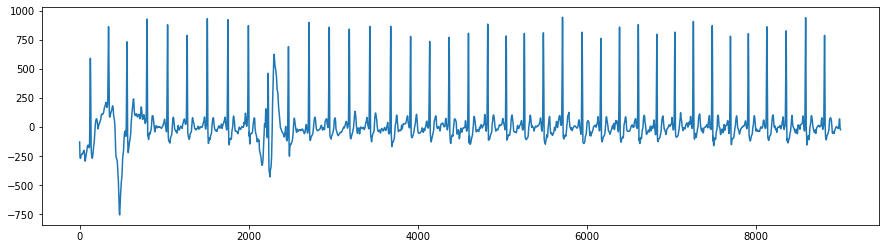

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Plot normal
mat1 = scipy.io.loadmat('/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/sample2017/validation/A00001.mat')
time1 = np. arange(len(mat1["val"][0]))
plt.figure(figsize=(15, 4))
plt.plot(time1, mat1["val"][0])

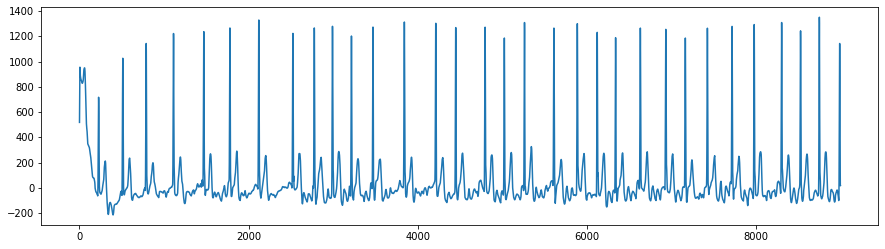

In [ ]:
# Plot fibrilação atrial
mat2 = scipy.io.loadmat('/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/sample2017/validation/A00004.mat')
time2 = np. arange(len(mat2["val"][0]))
plt.figure(figsize=(15, 4))
plt.plot(time2, mat2["val"][0])

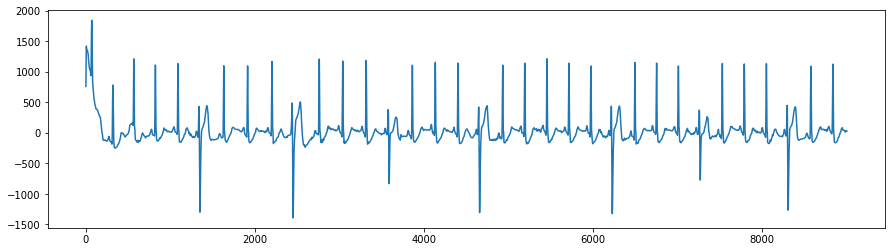

In [ ]:
# Plot outro
mat3 = scipy.io.loadmat('/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/sample2017/validation/A00077.mat')
time3 = np. arange(len(mat3["val"][0]))
plt.figure(figsize=(15, 4))
plt.plot(time3, mat3["val"][0])

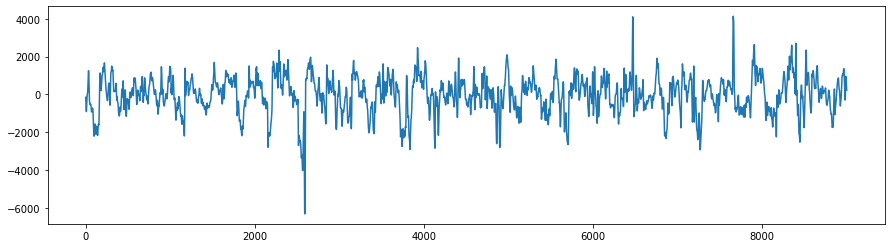

In [ ]:
# Plot ruído
mat4 = scipy.io.loadmat('/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/sample2017/validation/A01246.mat')
time4 = np. arange(len(mat4["val"][0]))
plt.figure(figsize=(15, 4))
plt.plot(time4, mat4["val"][0])

## Rótulando os dados:
- Basicamente iremos ler os arquivos de classificação e tranformar em um dataframe que rótule os dados.

In [ ]:
records=pd.read_csv('/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/training/RECORDS',names=['records'])
records_af=pd.read_csv('/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/training/RECORDS-af',names=['records'])
records_noisy=pd.read_csv('/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/training/RECORDS-noisy',names=['records'])
records_normal=pd.read_csv('/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/training/RECORDS-normal',names=['records'])
records_other=pd.read_csv('/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/training/RECORDS-other',names=['records'])

In [ ]:
records_af['records_af']=1
records_noisy['records_noisy']=1
records_normal['records_normal']=1
records_other['records_other']=1
records_af.head()

,records,records_af
0,A00/A00004,1
1,A00/A00005,1
2,A00/A00009,1
3,A00/A00015,1
4,A00/A00027,1


In [ ]:
records_rotulados=records.merge(records_af,how='left', on='records')
records_rotulados.head()

,records,records_af
0,A00/A00001,NaN
1,A00/A00002,NaN
2,A00/A00003,NaN
3,A00/A00004,1.0
4,A00/A00005,1.0


In [ ]:
records_rotulados=records_rotulados.merge(records_noisy,how='left', on='records')
records_rotulados=records_rotulados.merge(records_normal,how='left', on='records')
records_rotulados=records_rotulados.merge(records_other,how='left', on='records')
records_rotulados.head()

,records,records_af,records_noisy,records_normal,records_other
0,A00/A00001,NaN,NaN,1.0,NaN
1,A00/A00002,NaN,NaN,1.0,NaN
2,A00/A00003,NaN,NaN,1.0,NaN
3,A00/A00004,1.0,NaN,NaN,NaN
4,A00/A00005,1.0,NaN,NaN,NaN


In [ ]:
records_rotulados=records_rotulados.fillna(0)
records_rotulados.head()

,records,records_af,records_noisy,records_normal,records_other
0,A00/A00001,0.0,0.0,1.0,0.0
1,A00/A00002,0.0,0.0,1.0,0.0
2,A00/A00003,0.0,0.0,1.0,0.0
3,A00/A00004,1.0,0.0,0.0,0.0
4,A00/A00005,1.0,0.0,0.0,0.0


In [ ]:
records_rotulados['rotulo']=np.nan
for i in records_rotulados.index:
  for j in records_rotulados.columns[1:]:
    if records_rotulados[j][i]==1:
      records_rotulados['rotulo'][i]=j

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
records_rotulados.head()

,records,records_af,records_noisy,records_normal,records_other,rotulo
0,A00/A00001,0.0,0.0,1.0,0.0,records_normal
1,A00/A00002,0.0,0.0,1.0,0.0,records_normal
2,A00/A00003,0.0,0.0,1.0,0.0,records_normal
3,A00/A00004,1.0,0.0,0.0,0.0,records_af
4,A00/A00005,1.0,0.0,0.0,0.0,records_af


## Janelamento:

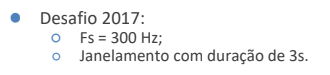

- Para um janelamento de 3s para Fs=300Hz pegaremos janelas de 900 dados;
- A sobreposição pode ser ajustada modificando a variavel sjan.

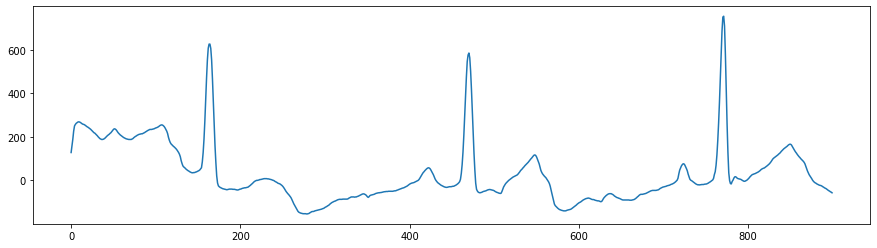

In [ ]:
# Exemplo de 1 janela
mat1 = scipy.io.loadmat('/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/sample2017/validation/A00002.mat')
time1 = np. arange(len(mat1["val"][0][0:900]))
plt.figure(figsize=(15, 4))
plt.plot(time1, mat1["val"][0][0:900])

In [ ]:
# Função que retorna as janelas geradas de um sinal
def gera_janelas(sjan,tam_janela, data):

  tamanho=len(data)
  #num_janelas=math.ceil(tamanho/tam_janela) #arredonda pra cima
  #O arredondamento para cima nos retorna uma janela com menos de 900 elementos
  
  num_janelas=math.floor(tamanho/tam_janela) #arredonda pra baixo
  #Dessa forma algumas vezes perderemos uma janela, 
  #porém a janela perdida terá menos de 3s de dados e pode ser descartada.

  #sjan=30 #valor de sobreposição da janela
  
  janelas=[]
  b=tam_janela #900 = 3s
  a=0
  for i in range(num_janelas):
    if i==0:
      janelas.append(data[a:(b+sjan)]) ##janelamento 0:tam_janela+sobreposição
    #elif i==(num_janelas-1):
    #  janelas.append(data[a:])
    else:
      janelas.append(data[(a-sjan):(b+sjan)]) ##janemanto 850:1850 ... (50 antes e 50 depois)
    #print(a)
    #print(b)
    a=b
    b+=tam_janela
  return janelas

In [ ]:
# Função que apresenta o plot das janelas fornecidas
def printa_janelas(janelas):
  for i in range(len(janelas)):
    time1 = np. arange(len(janelas[i]))
    plt.figure(figsize=(15, 4))
    plt.plot(time1, janelas[i])

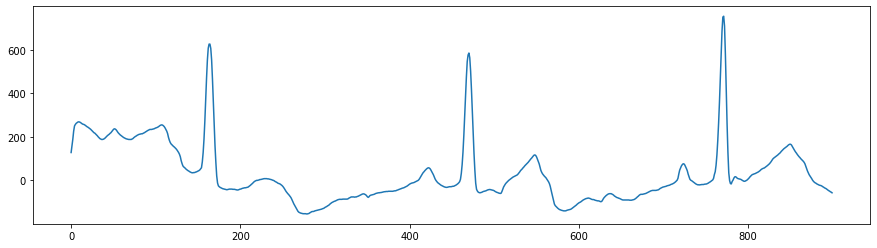

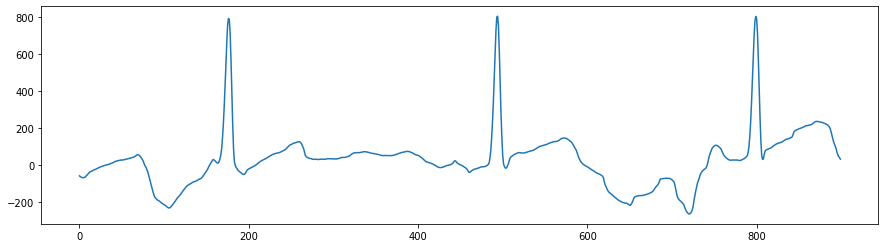

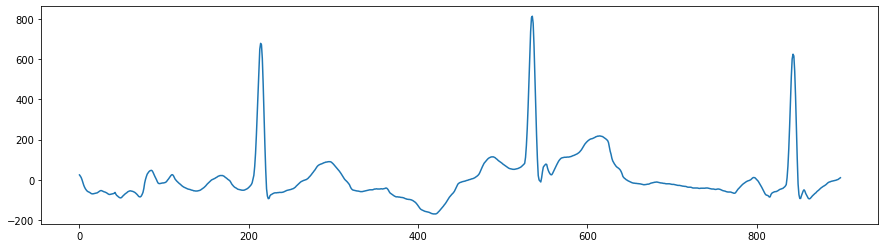

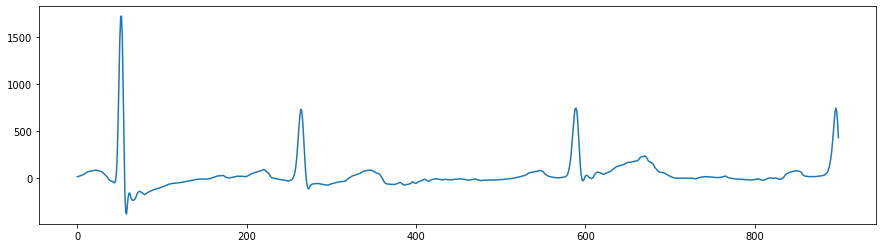

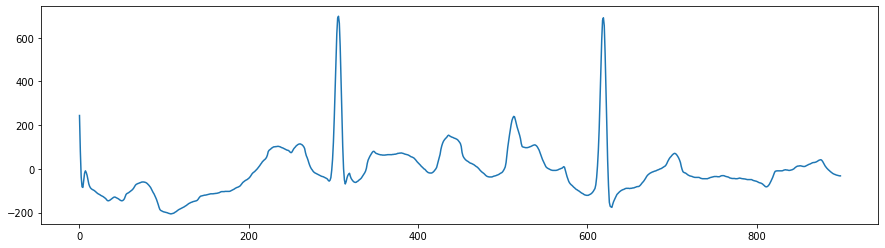

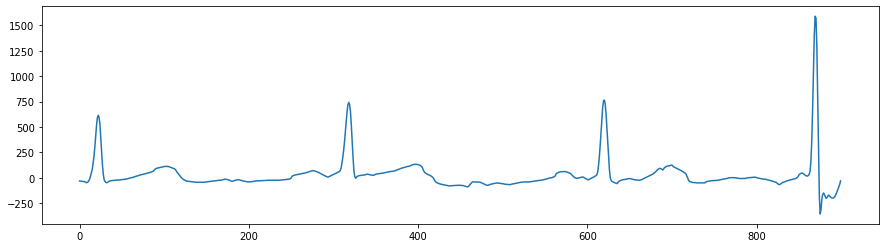

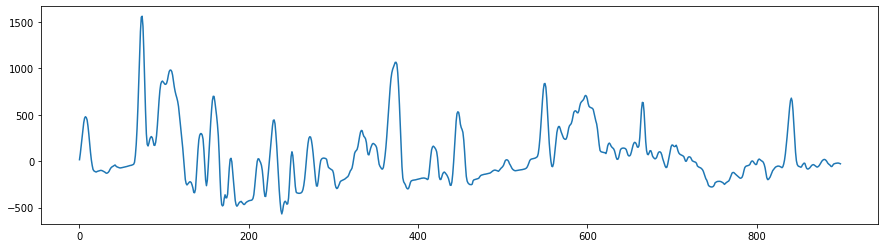

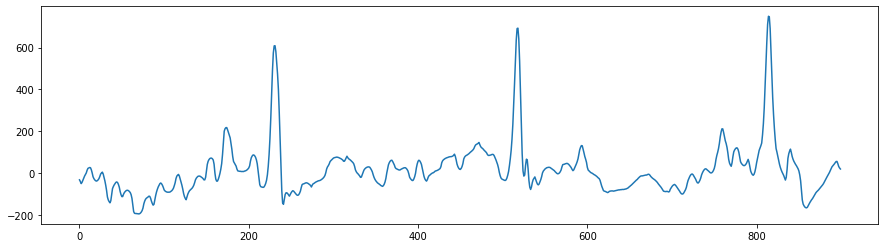

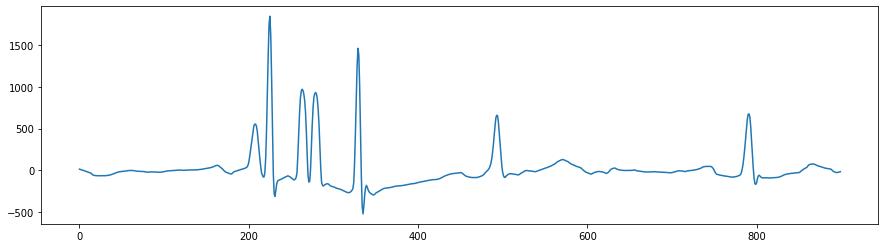

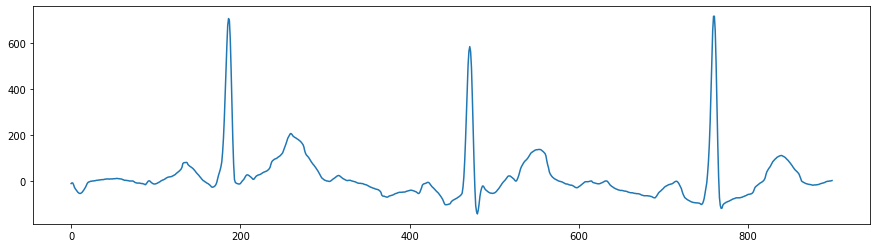

In [ ]:
data=mat1["val"][0]
janelas= gera_janelas(0,900,data)
printa_janelas(janelas)

## Filtragem:
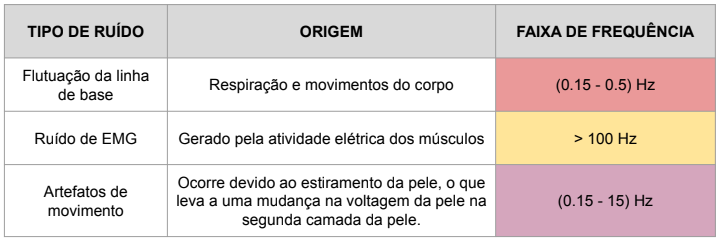

In [ ]:
# https://acervolima.com/filtro-digital-high-pass-butterworth-em-python/
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4624499/

#constantes
fs=300
nyq=.5*fs

# Filtro Butterworth passa faixa de ordem n

def filtro_butter(fc,ordem):
  low=fc[0]/nyq
  high=fc[1]/nyq
  coefs=signal.butter(ordem, [low,high], 'band')
  return coefs

In [ ]:

def filtro_janelas(fc,ordem,janelas):

  filtrado=[]
  for n in range(len(janelas)):
    aux=filtro_butter(fc,ordem)  #([0.5,100],7)
    filtrado.append(signal.filtfilt(aux[0],aux[1],janelas[n]))
  
  return filtrado

Testando o filtro:

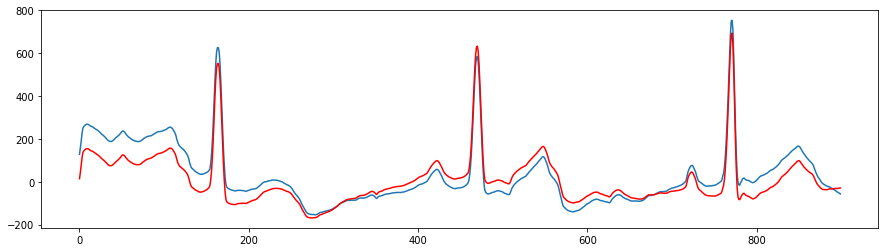

In [ ]:
filtrado=filtro_janelas([5,100],7,janelas)

#aux=filtro_butter([0.5,100],7)
#filtrado= signal.filtfilt(aux[0],aux[1],janelas[7])
#tentar plotar sinal depois do filtro

time1 = np. arange(len(filtrado[0]))
plt.figure(figsize=(15, 4))
plt.plot(time1, janelas[0])
plt.plot(time1, filtrado[0],color='red')

In [ ]:
#Podemos gerar um dataframe com os dados filtrados com a linha abaixo
#pd.DataFrame(filtrado)

## Trabalhando nos sinais:

Criando valor dos records:
- média, mediana, quartis e outliers (comentados)
- atributos:

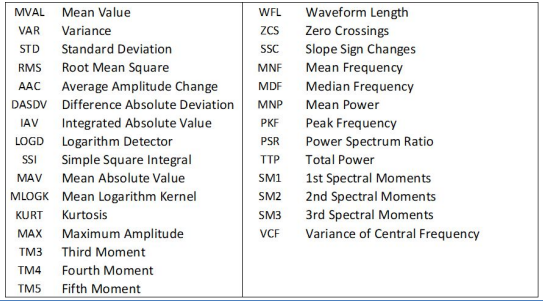

In [ ]:
#Função dada pelos monitores
#Precisou passar por algumas mudanças pois nao estava concatenando os dados para todas as janelas

from scipy import signal
from scipy.stats import kurtosis
import numpy as np


def atributos(k):
    # k is the dataset
  
  [lin, col] = k.shape

  AAC = []
  DASDV = []
  IAV = []
  LOGD = []
  MAV = []
  MLOGK = []
  RMS = []
  KURT = []
  SSC = []
  SSI = []
  VAR = []
  WFL = []
  ZCS = []
  TM3= []
  TM4 = []
  TM5 = []
  STD = []
  MVAL = []
  MAX = []
  PSR = []
  PKF = []
  MNP = []
  MDF = []
  MNF = []
  TTP = []
  VCF = []
  SM1 = []
  SM2 = []
  SM3 = []



      # colocar o loop (o = 1:col)
  for o in range(0,col):

    F, P = scipy.signal.periodogram(k.iloc[:,o])

    AAC.append((1/lin)*(np.sum(np.abs(np.diff(k.iloc[o,:])))))
    DASDV.append(np.sqrt((1/(lin-1))*np.sum(np.diff(k.iloc[o,:])**2)))
    IAV.append(np.sum(k.iloc[o,:]))
    LOGD.append(np.exp((1/lin)*(np.sum(np.log10(0.0001 + (np.abs(k.iloc[o,:])))))))
    MAV.append((1/lin)*(np.sum(np.abs(k.iloc[o,:]))))
    MLOGK.append((1/lin)*(np.abs(np.sum(k.iloc[o,:]))))
    RMS.append(np.sqrt((1/lin)*(np.sum(k.iloc[o,:]**2))))
    KURT.append(kurtosis(k.iloc[o,:]))
    SSC.append(len(np.nonzero(np.diff(np.sign(np.diff(k.iloc[o,:]))))))
    SSI.append(np.sum(k.iloc[o,:]**2))
    VAR.append(np.var(k.iloc[o,:]))
    WFL.append(0)
    ZCS.append(len(np.nonzero(np.diff(np.sign(k.iloc[o,:])))))
    TM3.append(np.abs((1/lin)*(np.sum(k.iloc[o,:]**3))))
    TM4.append(np.abs((1/lin)*(np.sum(k.iloc[o,:]**4))))
    TM5.append(np.abs((1/lin)*(np.sum(k.iloc[o,:]**5))))
    STD.append(np.std(k.iloc[o,:]))
    MVAL.append((1/lin)*(np.sum(k.iloc[o,:])))
    MAX.append(np.amax(k.iloc[o,:]))
    PSR.append(((np.amax(P)/(np.sum(P)))))
    MNF.append(np.sum(F*P)/np.sum(P))
    MNP.append(np.sum(P)/len(F))
    PKF.append(np.amax(P))
    TTP.append(np.sum(P))
    SM1.append(np.sum(F*P))
    SM2.append(np.sum((F**2)*P))
    SM3.append(np.sum((F**3)*P))
    VCF.append((((SM2[o]/TTP[o]) - ((SM1[o])/TTP[o]))**2))
    MDF.append((1/2)*(np.sum(P)))


  colunas= ['AAC', 'DASDV', 'IAV', 'LOGD', 'MAV', 'MLOGK', 'RMS', 'KURT', 'SSC', 'SSI', 
            'VAR', 'WFL', 'ZCS', 'TM3', 'TM4', 'TM5', 'STD', 'MVAL', 'MAX', 'PSR', 'MNF', 'MNP', 'PKF', 'TTP', 'SM1', 'SM2', 'SM3', 'VCF', 'MDF']

  #podemos criar um dataframe a partir do dicionario das variaveis e dos valores coletados
  #podemos criar um dicionario a partir da junção das listas utilizando zip()
  #a funçao zip basicamente empilha os vetores e eles se comportam como uma "linha" de matriz 
  #estamos empilhando as colunas com um vetor de vetores

  dataf=pd.DataFrame(data=dict(zip(colunas,[AAC, DASDV, IAV, LOGD, MAV, MLOGK, RMS, KURT, SSC, SSI, 
                                               VAR, WFL, ZCS, TM3, TM4, TM5, STD, MVAL, MAX, PSR, MNF, MNP, PKF, TTP, SM1, SM2, SM3, VCF, MDF])))
  
  #allFeatures = np.hstack((AAC, DASDV, IAV, LOGD, MAV, MLOGK, RMS, KURT, SSC, SSI, VAR, WFL, ZCS, TM3, TM4, TM5, STD, MVAL, MAX, PSR, MNF, MNP, PKF, TTP, SM1, SM2, SM3, VCF, MDF))
  
  #dessa forma retornaremos um dataframe com os atributos de cada janela separado por linha
  return dataf

In [ ]:
atributos(df)

,AAC,DASDV,IAV,LOGD,MAV,MLOGK,RMS,KURT,SSC,SSI,...,PSR,MNF,MNP,PKF,TTP,SM1,SM2,SM3,VCF,MDF
0,0.503459,5.283061,-158.099991,1.026129,0.602203,0.175667,6.356984,8.822565,1,36370.125005,...,0.269921,0.015600,101865.539176,1.240052e+07,4.594136e+07,7.166951e+05,29711.577956,2020.403154,0.000224,2.297068e+07
1,0.409013,3.720032,-223.243584,1.023897,0.446366,0.248048,3.828860,0.873892,1,13194.153642,...,0.126382,0.026864,78674.471194,4.484312e+06,3.548219e+07,9.531763e+05,47464.348186,3067.880092,0.000652,1.774109e+07
2,0.571983,5.499678,-299.269226,1.026238,0.493506,0.332521,4.181523,0.313823,1,15736.623270,...,0.142544,0.031122,66999.266015,4.307196e+06,3.021667e+07,9.403945e+05,48047.753742,3104.967742,0.000872,1.510833e+07
3,0.756518,8.883531,-387.068323,1.028589,0.670970,0.430076,7.074615,5.863378,1,45045.164100,...,0.140696,0.035719,56764.098923,3.601909e+06,2.560061e+07,9.144244e+05,48178.259145,3161.089874,0.001145,1.280030e+07
4,0.923751,12.103823,-464.919672,1.029803,0.826060,0.516577,10.044975,8.783992,1,90811.376938,...,0.138500,0.032107,61499.324775,3.841455e+06,2.773620e+07,8.905154e+05,46092.925792,3050.835200,0.000927,1.386810e+07
5,1.053614,13.930924,-502.026176,1.030621,0.926806,0.557807,11.646777,9.242095,1,122082.666609,...,0.125417,0.031784,64605.889686,3.654308e+06,2.913726e+07,9.261026e+05,46866.600032,2983.642570,0.000911,1.456863e+07
6,1.136486,14.267326,-501.654171,1.031247,0.973788,0.557394,11.763528,8.464197,1,124542.529076,...,0.160144,0.029665,75529.704219,5.455121e+06,3.406390e+07,1.010500e+06,50925.720409,3295.966672,0.000794,1.703195e+07
7,1.210200,14.163059,-504.131593,1.031703,1.002389,0.560146,11.425679,7.162102,1,117491.517308,...,0.129499,0.030486,66117.562420,3.861519e+06,2.981902e+07,9.090597e+05,46175.921464,2990.202386,0.000837,1.490951e+07
8,1.292819,14.365762,-532.110257,1.032026,1.039311,0.591234,11.375818,5.903191,1,116468.301637,...,0.129134,0.032838,67206.119031,3.914053e+06,3.030996e+07,9.953064e+05,52004.884710,3424.637907,0.000969,1.515498e+07
9,1.380407,14.868620,-579.684991,1.032168,1.081072,0.644094,11.628538,4.747267,1,121700.598958,...,0.121169,0.026218,86559.063865,4.730205e+06,3.903814e+07,1.023498e+06,50487.916619,3272.649711,0.000621,1.951907e+07


In [ ]:
 #Podemos utilizar concatenação de string para acessar os arquivos que queremos

Location='/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/training'

Loc=Location+'/'+records_rotulados['records'][14]+'.mat'
data=scipy.io.loadmat(Loc)
data=data['val'][0]

In [ ]:
Location='/content/drive/MyDrive/PDS/physionet.org/files/challenge-2017/1.0.0/training'

#records_rotulados['mean']=0.0
#records_rotulados['median']=0.0
#records_rotulados['max']=0.0
#records_rotulados['min']=0.0
#records_rotulados['upper_quartile']=0.0
#records_rotulados['lower_quartile']=0.0
#records_rotulados['upper_whisker']=0.0
#records_rotulados['lower_whisker']=0.0
#records_rotulados['up_outlier']=False
#records_rotulados['low_outlier']=False

colunas= ['AAC', 'DASDV', 'IAV', 'LOGD', 'MAV', 'MLOGK', 'RMS', 'KURT', 'SSC', 'SSI', 
            'VAR', 'WFL', 'ZCS', 'TM3', 'TM4', 'TM5', 'STD', 'MVAL', 'MAX', 'PSR', 'MNF', 
          'MNP', 'PKF', 'TTP', 'SM1', 'SM2', 'SM3', 'VCF', 'MDF','rotulo']

All_Data=pd.DataFrame(columns=colunas)

# Esse for abre todos os arquivos e lê cada vetor, faz as coletas de dados depois exclui a variavel.

for i in records_rotulados.index:
  if i%100==0:
    print(i)

  Loc=Location+'/'+records_rotulados['records'][i]+'.mat'
  data=scipy.io.loadmat(Loc)
  data=data['val'][0]
  
  #### JANELAMENTO ####

  janelas= gera_janelas(0,900,data) #um vetor de vetores de janelas

  del data
  #printa_janelas(janelas)

  #####################

  #### FILTRO ####

  filtrado=filtro_janelas([15,100],7,janelas) #retorna um vetor de vetores de janelas filtradas
  del janelas

  ################

  #### ATRIBUTOS #####

  df=pd.DataFrame(filtrado).T
  df_atributos=atributos(df)
  del df, filtrado

  df_atributos['rotulo']=records_rotulados['rotulo'][i] #adicionando o rotulo

  ####################


  #### MERGE DOS DATAFRAMES ####

  All_Data=pd.concat([All_Data,df_atributos])
    
  ##############################


All_Data=All_Data.reset_index(drop=True)

  #records_rotulados['mean'][i]=np.mean(data)
  #records_rotulados['median'][i]=np.median(data)
  #records_rotulados['max'][i]=data.max()
  #records_rotulados['min'][i]=data.min()
  #records_rotulados['upper_quartile'][i] = np.percentile(data, 75)
  #records_rotulados['lower_quartile'][i] = np.percentile(data, 25)
  #iqr = records_rotulados['upper_quartile'][i] - records_rotulados['lower_quartile'][i]
  #records_rotulados['upper_whisker'][i] = data[data<=records_rotulados['upper_quartile'][i]+1.5*iqr].max()
  #records_rotulados['lower_whisker'][i] = data[data>=records_rotulados['lower_quartile'][i]-1.5*iqr].min()

  #if records_rotulados['max'][i]>records_rotulados['upper_whisker'][i]:
  #  records_rotulados['up_outlier']=True

  #if records_rotulados['min'][i]<records_rotulados['lower_whisker'][i]:
  #  records_rotulados['low_outlier']=True
  


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500


In [ ]:
All_Data.head(10)

,AAC,DASDV,IAV,LOGD,MAV,MLOGK,RMS,KURT,SSC,SSI,...,MNF,MNP,PKF,TTP,SM1,SM2,SM3,VCF,MDF,rotulo
0,0.014918,0.249478,4.463497,0.991595,0.008702,0.004959,0.164839,3.540651,1,24.454593,...,0.063894,3091.679180,180596.416698,1.394347e+06,89089.832452,5941.970935,423.504146,0.003556,6.971737e+05,records_normal
1,0.181633,2.984973,-69.643427,1.006168,0.114152,0.077382,2.073964,3.198843,1,3871.193070,...,0.065477,4749.720058,224624.910502,2.142124e+06,140258.779188,9642.782895,708.588132,0.003718,1.071062e+06,records_normal
2,0.356967,5.912329,-149.431177,1.007403,0.217954,0.166035,4.151539,3.475106,1,15511.747058,...,0.065249,2699.256969,121304.453855,1.217365e+06,79431.710943,5450.440332,404.920814,0.003693,6.086824e+05,records_normal
3,0.508356,8.577030,-224.236325,1.010169,0.302464,0.249151,6.044954,3.861519,1,32887.320294,...,0.064060,5016.974783,244966.392467,2.262656e+06,144945.006617,9868.267169,729.265065,0.003564,1.131328e+06,records_normal
4,0.593252,10.327187,-268.537133,1.010313,0.343491,0.298375,7.276169,4.243820,1,47648.370623,...,0.065870,3961.774539,204432.282923,1.786760e+06,117694.514374,8165.575346,608.603445,0.003758,8.933802e+05,records_normal
5,0.591544,10.754421,-270.351932,1.009335,0.334437,0.300391,7.562431,4.517999,1,51471.326987,...,0.065675,4832.802343,216959.533497,2.179594e+06,143144.400025,9825.953723,715.724227,0.003741,1.089797e+06,records_normal
6,0.525643,9.977198,-241.371161,1.007271,0.289279,0.268190,7.013180,4.736470,1,44266.224829,...,0.065106,4420.300457,147869.255913,1.993556e+06,129793.100632,8832.649519,638.820651,0.003682,9.967778e+05,records_normal
7,0.426825,8.026196,-186.261925,1.004642,0.225710,0.206958,5.654655,4.914479,1,28777.611049,...,0.065965,4555.132455,107724.356646,2.054365e+06,135517.055934,9377.174653,692.539880,0.003770,1.027182e+06,records_normal
8,0.281952,4.899069,-98.161237,1.006210,0.151488,0.109068,3.466119,4.748996,1,10812.579903,...,0.066003,4725.436819,187857.680891,2.131172e+06,140663.220343,9748.449172,723.031798,0.003773,1.065586e+06,records_normal
9,0.110874,1.263494,11.292430,1.007316,0.091099,0.012547,1.140489,0.071950,1,1170.644187,...,0.065303,4210.444009,183623.770345,1.898910e+06,124005.247218,8456.530321,613.320349,0.003703,9.494551e+05,records_normal


In [ ]:
All_Data.to_csv('export_data_f15_100.csv',index=False)

In [ ]:
######

In [ ]:
records_rotulados.head()

,records,records_af,records_noisy,records_normal,records_other,rotulo
0,A00/A00001,0.0,0.0,1.0,0.0,records_normal
1,A00/A00002,0.0,0.0,1.0,0.0,records_normal
2,A00/A00003,0.0,0.0,1.0,0.0,records_normal
3,A00/A00004,1.0,0.0,0.0,0.0,records_af
4,A00/A00005,1.0,0.0,0.0,0.0,records_af


In [ ]:
# Podemos usar essa celula para exportar o dataframe para csv caso o processamento demore bastante 
# e seja mais viavel realizar apenas uma vez.

#records_rotulados.to_csv('records_rotulados.csv',index=False)

## Modelo de Predição:

- Podemos começar criando um 'base model' utilizando um classificador dummy no qual chutaria os dados para o mais frequente.
- É legal observar como os dados estão dispostos (porcentagens) pois dados desbalanceados podem nos enganar em métricas de qualidade do modelo.
- Posteriormente podemos coletar a média e a mediana dos dados e tentar chegar a valores melhores.
- Também devemos pensar quais métricas são importantes para nosso modelo (accuracy, precision ...).

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

dummy_clf = DummyClassifier(strategy="most_frequent")


In [ ]:
#nosso X
All_Data.iloc[:,:29].head()

,AAC,DASDV,IAV,LOGD,MAV,MLOGK,RMS,KURT,SSC,SSI,...,PSR,MNF,MNP,PKF,TTP,SM1,SM2,SM3,VCF,MDF
0,0.014918,0.249478,4.463497,0.991595,0.008702,0.004959,0.164839,3.540651,1,24.454593,...,0.129520,0.063894,3091.679180,180596.416698,1.394347e+06,89089.832452,5941.970935,423.504146,0.003556,6.971737e+05
1,0.181633,2.984973,-69.643427,1.006168,0.114152,0.077382,2.073964,3.198843,1,3871.193070,...,0.104861,0.065477,4749.720058,224624.910502,2.142124e+06,140258.779188,9642.782895,708.588132,0.003718,1.071062e+06
2,0.356967,5.912329,-149.431177,1.007403,0.217954,0.166035,4.151539,3.475106,1,15511.747058,...,0.099645,0.065249,2699.256969,121304.453855,1.217365e+06,79431.710943,5450.440332,404.920814,0.003693,6.086824e+05
3,0.508356,8.577030,-224.236325,1.010169,0.302464,0.249151,6.044954,3.861519,1,32887.320294,...,0.108265,0.064060,5016.974783,244966.392467,2.262656e+06,144945.006617,9868.267169,729.265065,0.003564,1.131328e+06
4,0.593252,10.327187,-268.537133,1.010313,0.343491,0.298375,7.276169,4.243820,1,47648.370623,...,0.114415,0.065870,3961.774539,204432.282923,1.786760e+06,117694.514374,8165.575346,608.603445,0.003758,8.933802e+05


In [ ]:
#nosso y
All_Data.iloc[:,29].head()

0    records_normal
1    records_normal
2    records_normal
3    records_normal
4    records_normal
Name: rotulo, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(All_Data.iloc[:,:29], All_Data.iloc[:,29], random_state = 3)

dummy_clf.fit(X_train,y_train)

print('Acurácia do nosso modelo que apenas chuta todas as predições na mais frequente: {:.2f}'

.format(dummy_clf.score(X_test,y_test)))


Acurácia do nosso modelo que apenas chuta todas as predições na mais frequente: 0.59


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#from adspy_shared_utilities import plot_decision_tree

clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

print('Acurácia do classificador por Decision Tree nos dados de treino: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Acurácia do classificador por Decision Tree nos dados de teste: {:.4f}'
     .format(clf.score(X_test, y_test)))

Acurácia do classificador por Decision Tree nos dados de treino: 0.6079
Acurácia do classificador por Decision Tree nos dados de teste: 0.6032


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf= RandomForestClassifier(n_estimators=1000, min_samples_split=300, random_state=0).fit(X_train, y_train)

print('Acurácia do classificador por Random Forest nos dados de treino: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Acurácia do classificador por Random Forest nos dados de teste: {:.4f}'
     .format(clf.score(X_test, y_test)))

Acurácia do classificador por Random Forest nos dados de treino: 0.6261
Acurácia do classificador por Random Forest nos dados de teste: 0.6141


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 2, random_state = 0).fit(X_train, y_train)

print('Acurácia do classificador por Gradient Boosting nos dados de treino: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Acurácia do classificador por Gradient Boosting nos dados de teste: {:.4f}'
     .format(clf.score(X_test, y_test)))

Acurácia do classificador por Gradient Boosting nos dados de treino: 0.6153
Acurácia do classificador por Gradient Boosting nos dados de teste: 0.6107


In [ ]:
from itertools import starmap
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nnclf = MLPClassifier(max_iter=10000, hidden_layer_sizes=[10,10,10,10], solver='lbfgs',
                         random_state = 0).fit(X_train_scaled, y_train)

print('Acurácia do classificador por Rede Neural nos dados de treino: {:.4f}'
     .format(nnclf.score(X_train_scaled, y_train)))
print('Acurácia do classificador por Rede Neural nos dados de teste: {:.4f}'
     .format(nnclf.score(X_test_scaled, y_test)))

Acurácia do classificador por Rede Neural nos dados de treino: 0.6200
Acurácia do classificador por Rede Neural nos dados de teste: 0.6180
